# Broadcasting

Like _NumPy_ for Python, **Julia** supports "broadcasting" over array types - that is, performing an operation on the *elements* of an array, rather than on the array itself as a whole object.

Almost all Julia operations support being used in "broadcasting" mode - including function calls! In all cases, you just need to prepend the operation with a "." to use this functionality.

For example, given a simple array:

In [1]:
myarray = [1,2,3,4,5]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

We can distribute the "add 2" operation over all its elements by simply typing (note ".+" not "+"):

In [2]:
2 .+ myarray

5-element Vector{Int64}:
 3
 4
 5
 6
 7

We can also distribute on the left and the right, where we get "element-wise" addition:

In [3]:
myarray .+ myarray

5-element Vector{Int64}:
  2
  4
  6
  8
 10

As mentioned above, we can even distribute function calls - the "()" operator - over our list!

In [4]:
"parity(x) - return the odd/even property for the given value"
function parity(x::T) where (T<:Integer)
    if (x % 2) == 0
        "even"
    else
        "odd"
    end
end

parity

In [5]:
?parity  #demonstrate how the online docs work

search: parity partialsort! partialsort partialsortperm partialsortperm!



parity(x) - return the odd/even property for the given value


In [6]:
parity.(myarray)

5-element Vector{String}:
 "odd"
 "even"
 "odd"
 "even"
 "odd"

This kind of "implicit iteration" is very powerful, and can be used to very consisely represent a number of transformations.
For example, making use of the Julia "ImageShow" package family to naturally display a 2d matrix as an image...

In [7]:
using ImageCore, ImageInTerminal, ImageShow

We can define a simple function - the Mandelbrot set membership function:

In [8]:
function mk(c)
  i = 0; z = 0
  while i < 255 && abs(z) < 2.0
    z = z^2 + c
    i += 1
  end
  i
end

mk (generic function with 1 method)

And a matrix representing a subset of the complex plane:

In [9]:
argand = [ (i+j*1im) / 100 for i=-200:200, j=-200:200 ] ;


And then simply apply a composed function - using the \circ (∘) operator - to calculate the Mandelbrot set for all points, map them to a value from 0 to 1 and then represent them all as Grayscale pixels:

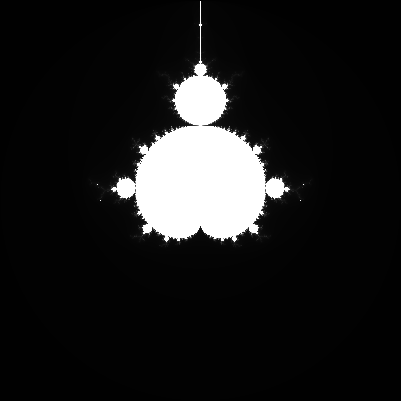

In [10]:
(Gray ∘ (x -> x/255.0) ∘ mk).(argand)

As before, because the broadcasting operator is a fundamental component of Julia, the JIT will optimise chains of broadcasted operations, much as it will optimise function composition with ∘, often reducing intermediate allocations of temporary objects.

In [11]:
arr = [0,1,2,3,4]

@code_lowered( mk.(2 .* arr) .+ 5 )

CodeInfo(
1 ─ %1 = Main.:+
│   %2 = Main.mk
│   %3 = Base.broadcasted(Main.:*, x1, x2)
│   %4 = Base.broadcasted(%2, %3)
│   %5 = Base.broadcasted(%1, %4, x3)
│   %6 = Base.materialize(%5)
└──      return %6
)

The special "Base.broadcasted" representation here wraps the operations, allowing them to be optimised using a single pre-allocated temporary object, before being "materialized" into the final output.